                           Data Type  Missing Values  Unique Values  Missing %
CAMPAIGN_NBR                 float64             100              0      100.0
ENGINE_TRACE_NBR              object              12             88       12.0
TRANSMISSION_TRACE_NBR        object              12             88       12.0
ENGINE_SOURCE_PLANT           object              12              9       12.0
TRANSMISSION_SOURCE_PLANT    float64              12              6       12.0
OPTN_FAMLY_CERTIFICATION      object              10              3       10.0
TOTALCOST                    float64               6             94        6.0
OPTF_FAMLY_EMISSIOF_SYSTEM    object               5              8        5.0
CAUSAL_PART_NM                object               5             18        5.0
LAST_KNOWN_DELVRY_TYPE_CD    float64               2             11        2.0


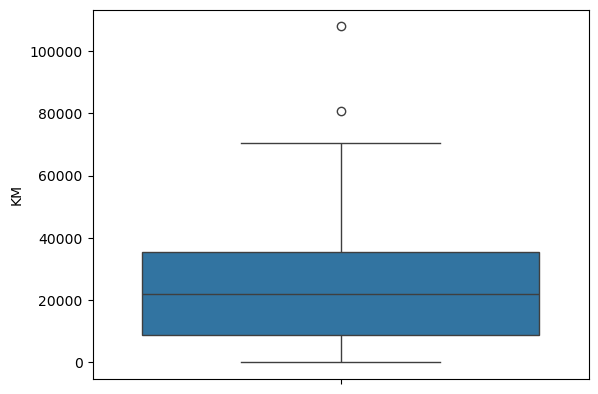

In [2]:
import pandas as pd

# Load your dataset (replace path if needed)
df = pd.read_excel("DA -Task 2..xlsx", sheet_name='Sheet1')
summary = pd.DataFrame({
    'Data Type': df.dtypes,
    'Missing Values': df.isnull().sum(),
    'Unique Values': df.nunique()
})
summary['Missing %'] = (summary['Missing Values'] / len(df)) * 100
summary = summary.sort_values('Missing %', ascending=False)

# Save or display results
summary.to_csv('column_summary.csv')
print(summary.head(10))
# Drop high-null columns like 'CAMPAIGN_NBR'
df.drop(columns=['CAMPAIGN_NBR'], inplace=True)

# Fill NA for categorical with 'Unknown'
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna('Unknown')

# Fill NA for numeric columns with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())
for col in cat_cols:
    df[col] = df[col].str.strip().str.lower()
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df['KM'])  # example for KM
plt.show()


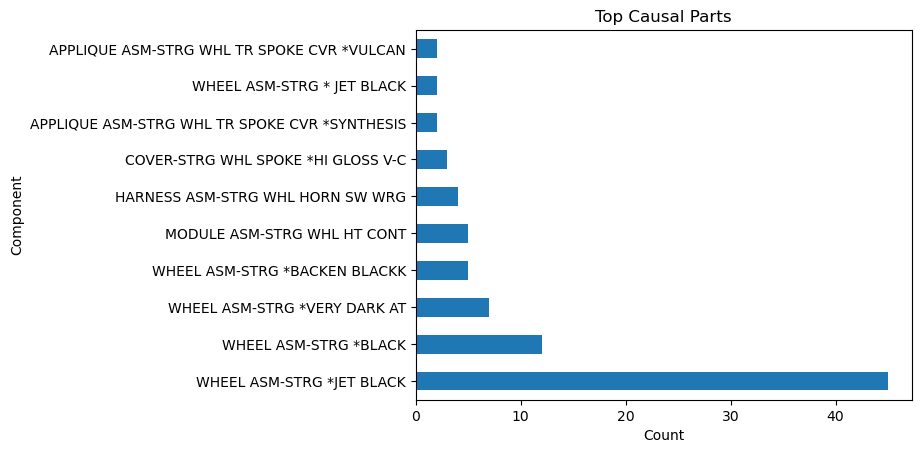

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_excel("DA -Task 2..xlsx", sheet_name='Sheet1')

# Normalize column names
df.columns = df.columns.str.strip().str.lower()

# Plot Top Causal Parts
df['causal_part_nm'].value_counts().head(10).plot(kind='barh')
plt.title('Top Causal Parts')
plt.xlabel('Count')
plt.ylabel('Component')
plt.show()
